<a href="https://colab.research.google.com/github/itismeganrms/ImageAnalysisPracticals_3/blob/main/IAAM_Practical3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diplib --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 16.7 MB/s eta 0:00:00


In [2]:
#import necessary packages

import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
from diplib import MeasurementTool as Tool
from diplib import Threshold, Label
from diplib import ColorSpaceManager as Color
import os
import math

DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


In [4]:
 # mount to internal image files
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/ImageAnalysis/'

Mounted at /content/drive/


In [3]:
#mount to internal image files
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/ImageAnalysis/Practical3/'

KeyboardInterrupt: 

# Part 3.1

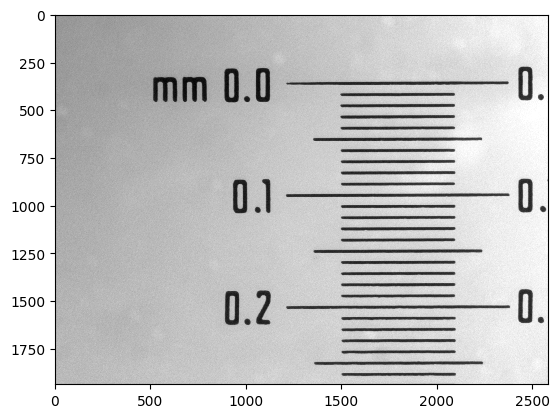

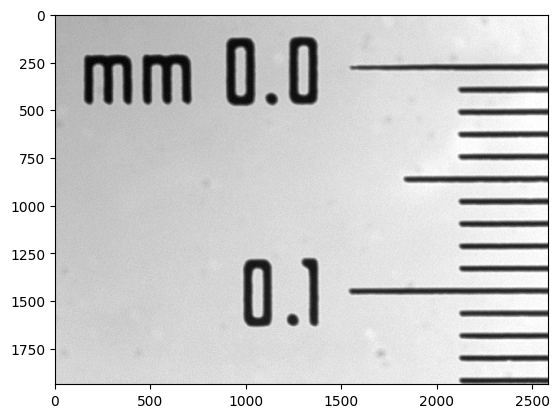

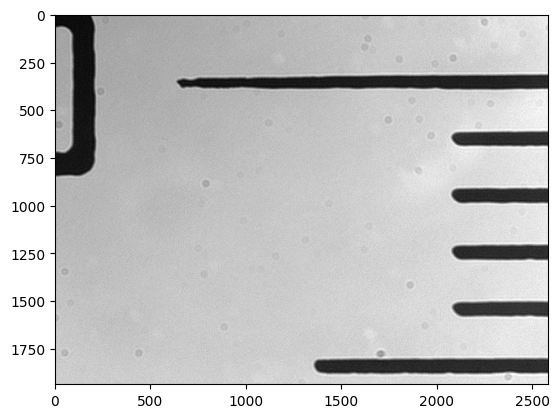

In [ ]:
# Display images
a_1 = dip.ImageReadTIFF(path + "CamIm01.tif")
a_1.Show()

a_2 = dip.ImageReadTIFF(path + "CamIm02.tif")
a_2.Show()

a_3 = dip.ImageReadTIFF(path + "CamIm03.tif")
a_3.Show()

## Calibration

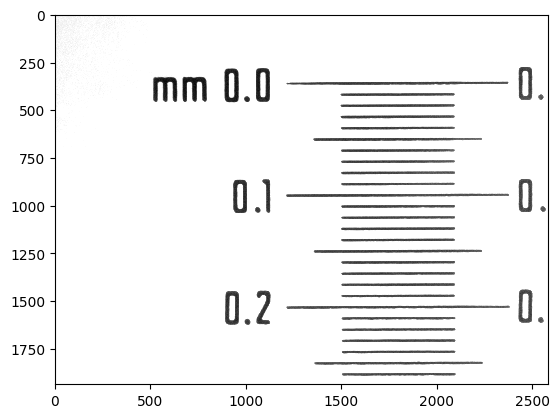

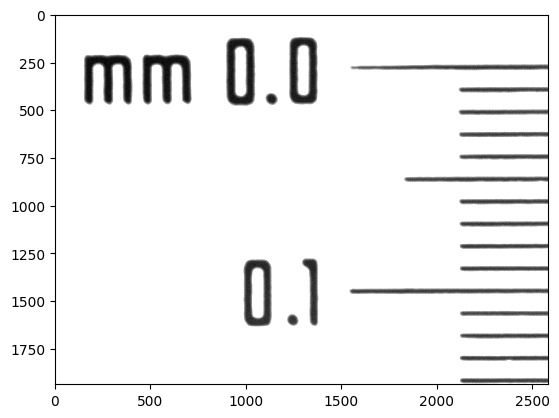

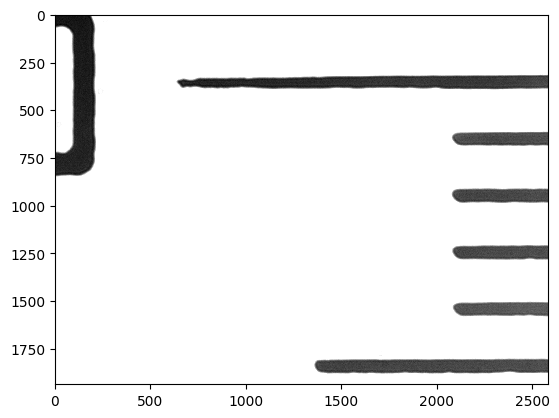

In [ ]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = [a_1, a_2, a_3]

a_1_stretched = dip.ContrastStretch(a_1, 0.0, 10.0)
a_1_stretched.Show()


a_2_stretched = dip.ContrastStretch(a_2, 0.0, 10.0)
a_2_stretched.Show()


a_3_stretched = dip.ContrastStretch(a_3, 0.0, 10.0)
a_3_stretched.Show()

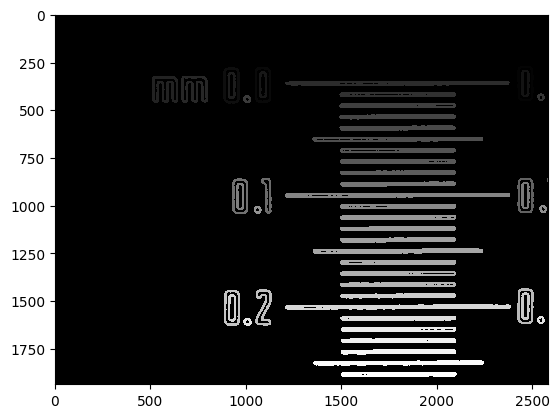

(1936, 2584)
52
1872
1865
0
642
1693


In [ ]:
edges_a1 = dip.GradientMagnitude(a_1_stretched)
mask_a1 = dip.Threshold(edges_a1)[0]
mask_a1 = dip.Dilation(mask_a1, 9)  # we want the mask to include the "tails" of the Gaussian
mask_a1 = dip.AreaOpening(mask_a1, filterSize=100)
mask_a1 = dip.Label(mask_a1)
mask_a1.Show()

maxint = -1
max_x = -1
max_y = -1

mask_a1 = np.array(mask_a1)
print(mask_a1.shape)

for i in range(1936):
  for j in range(2584):
    if (mask_a1[i][j] > maxint):
      maxint = mask_a1[i][j]
      max_x = i
      max_y = j

print(maxint)
print(max_x)
print(max_y)

min_int = 150

for j in range(1936):
  for i in range(2584):
    if (mask_a1[j][i] > 15 and mask_a1[j][i] < min_int):
      min_int = mask_a1[j][j]
      min_x = j
      min_y = i

print(min_int)
print(min_x)
print(min_y)

52


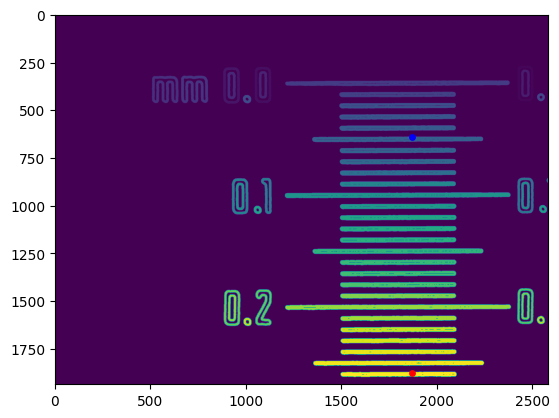

In [ ]:
implot = plt.imshow(mask_a1)


# put a red dot, size 40, at 2 locations:
plt.scatter(x=1872, y=1875, c='r', s=15)
plt.scatter(x=1872, y=642, c='b', s=15)

print(mask_a1[1872][1875])
plt.show()

In [ ]:
red = [1872, 1875] #red point on graph
blue = [1872, 642] #blue point on graph
distance = math.dist(red, blue)
#distance in mm between red and blue is 0.26 - 0.05 which is 0.21
mm = 0.21

print("Distance in number of pixels: {} and the distance in mm: {}".format(distance, mm))

Distance in number of pixels: 1233.0 and the distance in mm: 0.21


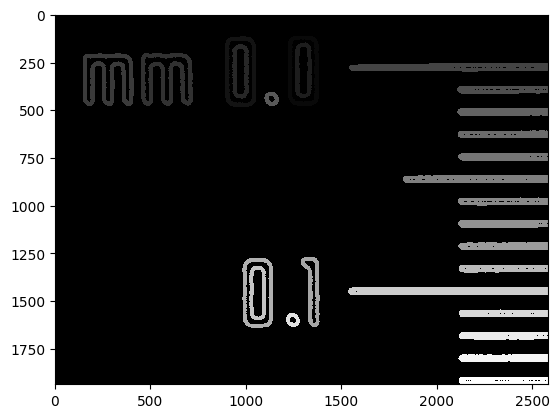

(1936, 2584)
26
1897
2364
0
1195
2157


In [ ]:
edges_a2 = dip.GradientMagnitude(a_2_stretched)
mask_a2 = dip.Threshold(edges_a2)[0]
mask_a2 = dip.Dilation(mask_a2, 9)  # we want the mask to include the "tails" of the Gaussian
mask_a2 = dip.AreaOpening(mask_a2, filterSize=100)
mask_a2 = dip.Label(mask_a2)
mask_a2.Show()

maxint = -1
max_x = -1
max_y = -1

mask_a2 = np.array(mask_a2)
print(mask_a2.shape)

for i in range(1936):
  for j in range(2584):
    if (mask_a2[i][j] > maxint):
      maxint = mask_a2[i][j]
      max_x = i
      max_y = j

print(maxint)
print(max_x)
print(max_y)


min_int = 150

for j in range(1936):
  for i in range(2584):
    if (mask_a2[j][i] > 15 and mask_a2[j][i] < min_int):
      min_int = mask_a2[j][j]
      min_x = j
      min_y = i

print(min_int)
print(min_x)
print(min_y)

0


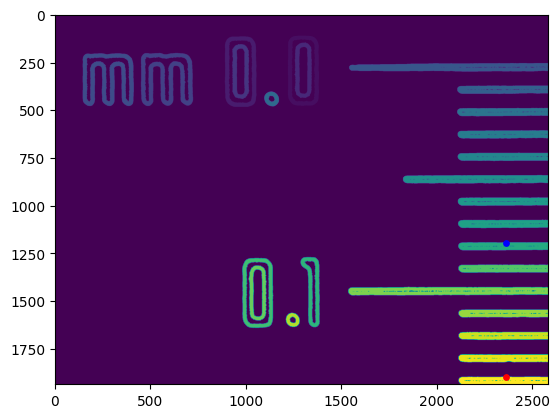

In [ ]:
implot = plt.imshow(mask_a2)


# put a red dot, size 40, at 2 locations:
plt.scatter(x=2364, y=1897, c='r', s=15)
plt.scatter(x=2364, y=1195, c='b', s=15)

print(mask_a2[1872][1875])
plt.show()

In [ ]:
red = [2364, 1897] #red point on graph
blue = [2364, 1195] #blue point on graph
distance = math.dist(red, blue)
#distance in mm between red and blue is 0.14 - 0.08 which is 0.06
mm = 0.06

print("Distance in number of pixels: {} and the distance in mm: {}".format(distance, mm))

Distance in number of pixels: 702.0 and the distance in mm: 0.06


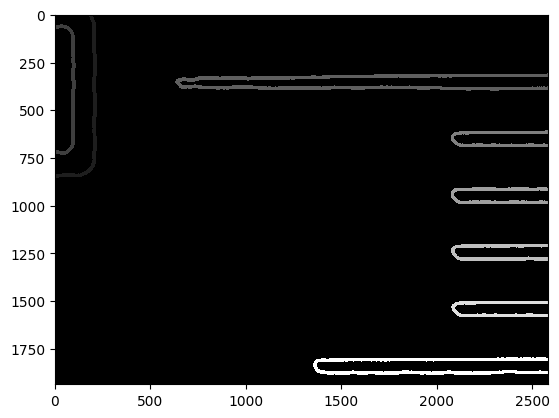

(1936, 2584)
8
1797
2313
150
1195
2157


In [ ]:
edges_a3 = dip.GradientMagnitude(a_3_stretched)
mask_a3 = dip.Threshold(edges_a3)[0]
mask_a3 = dip.Dilation(mask_a3, 9)  # we want the mask to include the "tails" of the Gaussian
mask_a3 = dip.AreaOpening(mask_a3, filterSize=100)
mask_a3 = dip.Label(mask_a3)
mask_a3.Show()

maxint = -1
max_x = -1
max_y = -1

mask_a3 = np.array(mask_a3)
print(mask_a3.shape)

for i in range(1936):
  for j in range(2584):
    if (mask_a3[i][j] > maxint):
      maxint = mask_a3[i][j]
      max_x = i
      max_y = j

print(maxint)
print(max_x)
print(max_y)


min_int = 150

for j in range(1936):
  for i in range(2584):
    if (mask_a3[j][i] > 15 and mask_a3[j][i] < min_int):
      min_int = mask_a3[j][j]
      min_x = j
      min_y = i

print(min_int)
print(min_x)
print(min_y)

8


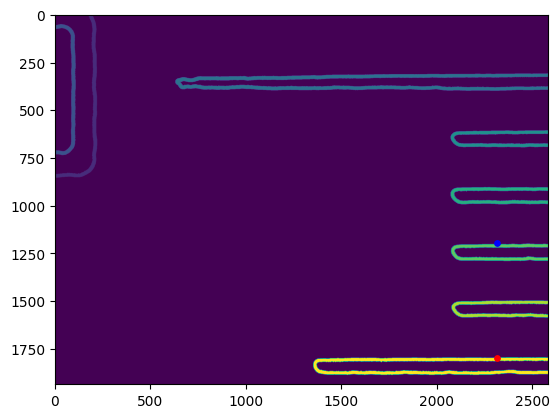

In [ ]:
implot = plt.imshow(mask_a3)


# put a red dot, size 40, at 2 locations:
plt.scatter(x=2313, y=1797, c='r', s=15)
plt.scatter(x=2313, y=1195, c='b', s=15)

print(mask_a3[1872][1875])
plt.show()

In [ ]:
red = [2313, 1797] #red point on graph
blue = [2313, 1195] #blue point on graph
distance = math.dist(red, blue)
#distance in mm between red and blue is 0.14 - 0.08 which is 0.06
mm = 0.02

print("Distance in number of pixels: {} and the distance in mm: {}".format(distance, mm))

Distance in number of pixels: 602.0 and the distance in mm: 0.02


# Part 3.2

In [ ]:
ics_image = dip.ImageReadICS(path +  "scale-img.ids")
#print(ics_image)

## **5. ICS Header**

In [ ]:
ics_image_data = dip.ImageReadICS(path + "scale-img.ics")

In [ ]:
print(ics_image_data)

2D Scalar image:
    data type:      SFLOAT
    sizes:          {256, 256}
    strides:        {1, 256}, tensor stride 1
    data pointer:   0x5a4b0f28b050 (shared among 1 images)
    origin pointer: 0x5a4b0f28b050



## **6. TIF Header**

In [6]:
im_tif = dip.ImageReadTIFF(path + "scale-img.tif")

In [ ]:
print(im_tif)

2D Scalar image:
    data type:      UINT8
    sizes:          {256, 256}
    strides:        {1, 256}, tensor stride 1
    data pointer:   0x5a4b0f23a510 (shared among 1 images)
    origin pointer: 0x5a4b0f23a510



### Header Data

In [ ]:
ics_image_array = np.array(ics_image_data)
print(ics_image_array[0])

[180. 179. 179. 180. 184. 182. 182. 181. 185. 185. 186. 185. 187. 190.
 189. 188. 190. 188. 190. 189. 190. 190. 193. 193. 191. 192. 192. 196.
 195. 194. 199. 194. 195. 197. 198. 197. 198. 200. 200. 196. 199. 202.
 203. 202. 201. 200. 200. 200. 204. 206. 206. 207. 206. 206. 209. 206.
 206. 207. 208. 207. 208. 206. 212. 210. 208. 207. 210. 208. 213. 212.
 210. 212. 214. 210. 211. 212. 214. 212. 215. 213. 215. 216. 216. 216.
 216. 214. 214. 213. 216. 216. 217. 218. 216. 216. 220. 217. 216. 217.
 218. 220. 218. 216. 220. 218. 220. 222. 219. 218. 218. 219. 220. 214.
 218. 221. 220. 220. 220. 220. 222. 220. 219. 221. 222. 219. 220. 221.
 220. 222. 221. 219. 222. 220. 220. 222. 223. 220. 220. 220. 224. 223.
 224. 222. 225. 223. 223. 224. 224. 222. 224. 224. 220. 222. 222. 220.
 224. 225. 226. 222. 223. 223. 224. 224. 225. 222. 224. 226. 224. 222.
 225. 226. 228. 221. 222. 224. 220. 222. 222. 220. 224. 223. 224. 222.
 223. 220. 222. 224. 221. 220. 222. 220. 223. 223. 222. 218. 220. 222.
 222. 

In [ ]:
im_tif_array = np.array(im_tif)
print(im_tif_array[0])

[180 179 179 180 184 182 182 181 185 185 186 185 187 190 189 188 190 188
 190 189 190 190 193 193 191 192 192 196 195 194 199 194 195 197 198 197
 198 200 200 196 199 202 203 202 201 200 200 200 204 206 206 207 206 206
 209 206 206 207 208 207 208 206 212 210 208 207 210 208 213 212 210 212
 214 210 211 212 214 212 215 213 215 216 216 216 216 214 214 213 216 216
 217 218 216 216 220 217 216 217 218 220 218 216 220 218 220 222 219 218
 218 219 220 214 218 221 220 220 220 220 222 220 219 221 222 219 220 221
 220 222 221 219 222 220 220 222 223 220 220 220 224 223 224 222 225 223
 223 224 224 222 224 224 220 222 222 220 224 225 226 222 223 223 224 224
 225 222 224 226 224 222 225 226 228 221 222 224 220 222 222 220 224 223
 224 222 223 220 222 224 221 220 222 220 223 223 222 218 220 222 222 222
 224 222 223 223 220 220 223 220 220 220 222 221 220 222 220 217 226 223
 220 220 222 224 223 222 222 220 222 220 218 220 222 221 220 218 220 220
 220 219 218 216 219 219 220 218 219 217 217 218 22

### Size

In [ ]:
print("The file size of the .ics image is {}".format(os.path.getsize(path + "scale-img.ids")))
print("The file size of the .tif image is {}".format(os.path.getsize(path + "scale-img.tif")))

The file size of the .ics image is 262144
The file size of the .tif image is 65769


# Part 3.3

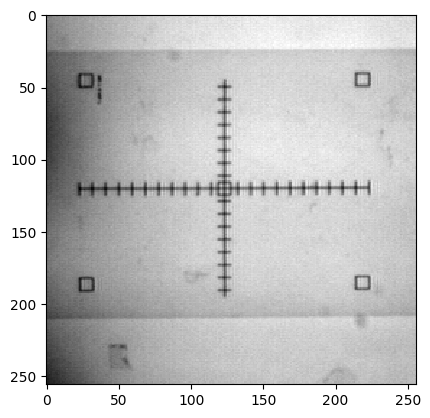

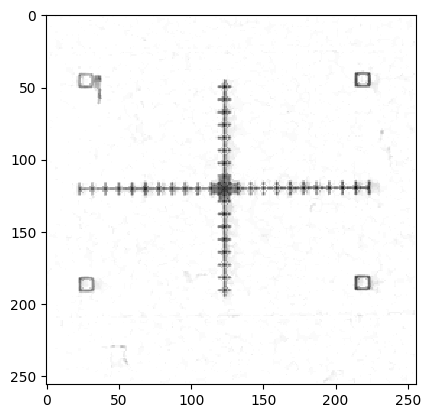

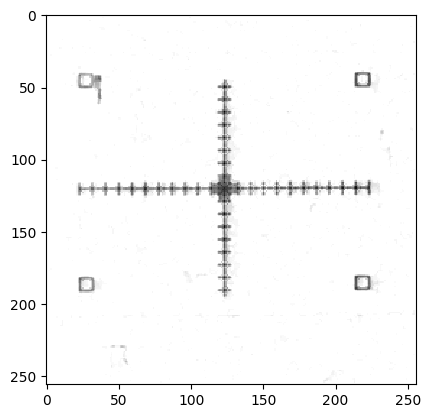

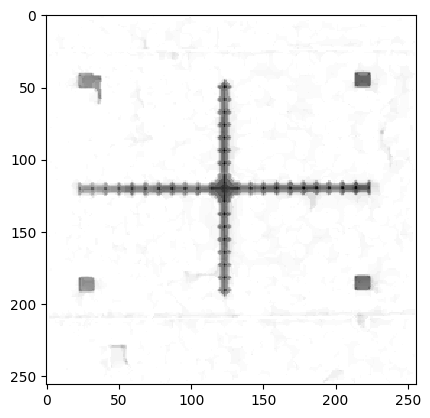

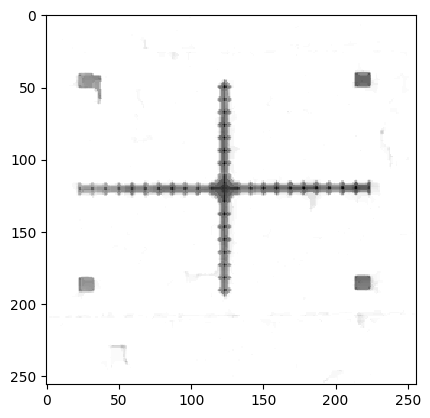

In [8]:
im_tif.Show()

im_tif_r_5 = dip.MorphologicalRange(im_tif, 5.0)
im_tif_r_5 = 1 - im_tif_r_5

im_tif_csr_5 = dip.ContrastStretch(im_tif_r_5, 0, 30)
im_tif_csr_5.Show()

im_tif_csr_5_15 = dip.ContrastStretch(im_tif_r_5, 0, 15)
im_tif_csr_5_15.Show()


im_tif_r_10 = dip.MorphologicalRange(im_tif, 10.0)
im_tif_r_10 = 1 - im_tif_r_10

im_tif_csr_10 = dip.ContrastStretch(im_tif_r_10, 0, 30)
im_tif_csr_10.Show()

im_tif_csr_10_15 = dip.ContrastStretch(im_tif_r_10, 0, 15)
im_tif_csr_10_15.Show()


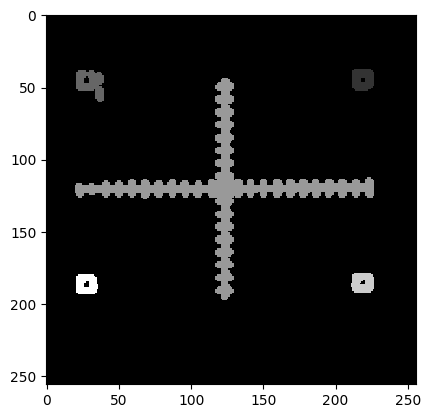

In [70]:
im_tif_csr_5_inv = 1-im_tif_csr_5 #invert the image
imtif1_dilated= dip.Dilation(im_tif_csr_5_inv, 5) #dilate the image
imtif1_thresh = dip.IsodataThreshold(imtif1_dilated)

imtif1_labeled = dip.Label(imtif1_thresh)
imtif1_labeled.Show()

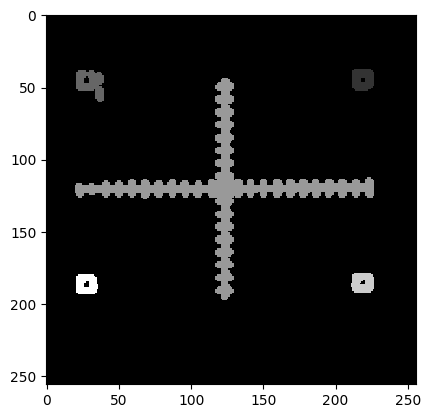

In [71]:
im_tif_csr_5_15_inv = 1-im_tif_csr_5_15 #invert the image
imtif2_dilated = dip.Dilation(im_tif_csr_5_15_inv, 5) #dilate the image
imtif2_thresh = dip.IsodataThreshold(imtif2_dilated)

imtif2_labeled = dip.Label(imtif2_thresh)
imtif2_labeled.Show()

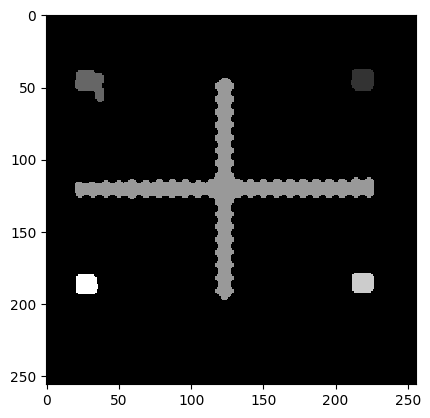

In [72]:
im_tif_csr_10_inv = 1-im_tif_csr_10 #invert the image
imtif3_dilated = dip.Dilation(im_tif_csr_10_inv, 5) #dilate the image
imtif3_thresh = dip.IsodataThreshold(imtif3_dilated)

imtif3_labeled = dip.Label(imtif3_thresh)
imtif3_labeled.Show()

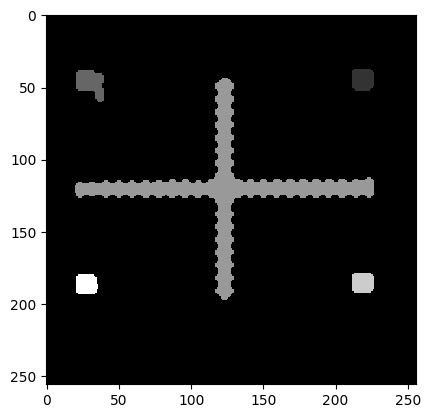

In [73]:
im_tif_csr_10_15_inv = 1-im_tif_csr_10_15 #invert the image
imtif4_dilated = dip.Dilation(im_tif_csr_10_15_inv, 5) #dilate the image
imtif4_thresh = dip.IsodataThreshold(imtif4_dilated)

imtif4_labeled = dip.Label(imtif4_thresh)
imtif4_labeled.Show()

In [77]:
im_tif_e = dip.Erosion(imtif1_dilated)
msr1 = Tool.Measure(imtif1_labeled, imtif1_dilated, ['Center', 'Gravity'])
print(msr1)

  |                  Center |                 Gravity | 
- | ----------------------- | ----------------------- | 
  |       dim0 |       dim1 |       dim0 |       dim1 | 
  |       (px) |       (px) |       (px) |       (px) | 
- | ---------- | ---------- | ---------- | ---------- | 
1 |      218.8 |      44.81 |      219.0 |      44.72 | 
2 |      30.87 |      47.44 |      30.66 |      47.34 | 
3 |      125.1 |      120.0 |      121.9 |      120.7 | 
4 |      218.7 |      185.5 |      219.2 |      185.5 | 
5 |      27.55 |      186.6 |      27.90 |      186.5 | 



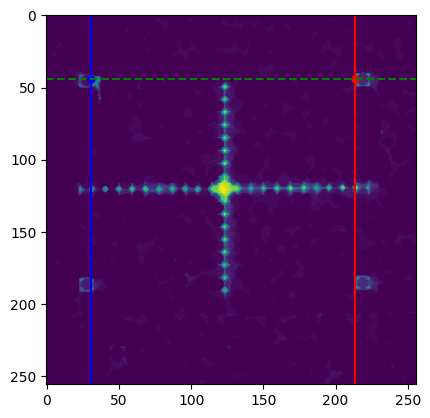

In [78]:
implot = plt.imshow(im_tif_e)

# put a red dot, size 40, at 2 locations:
plt.scatter(x=213.3, y=44.2, c='r', s=25)
plt.scatter(x=30.27, y=44.2, c='b', s=25)

plt.axvline(x = 213.3, color = 'r', linestyle = '-')
plt.axvline(x = 30.27, color = 'b', linestyle = '-')
plt.axhline(y = 44.2, color = 'g', linestyle = '--')

plt.show()

In [68]:
red = [213.3,44.2]
blue = [30.27,44.2]
dist = math.dist(red, blue)
mm = 20
# the distance is milimeters is approximately
print("the distance between red and blue is : {} in pixels: {}".format(dist, mm))

the distance between red and blue is : 183.03 in pixels: 20


In [79]:
im_tif2_e = dip.Erosion(imtif2_dilated)
msr2 = Tool.Measure(imtif2_labeled, imtif2_dilated, ['Center', 'Gravity'])
print(msr2)

  |                  Center |                 Gravity | 
- | ----------------------- | ----------------------- | 
  |       dim0 |       dim1 |       dim0 |       dim1 | 
  |       (px) |       (px) |       (px) |       (px) | 
- | ---------- | ---------- | ---------- | ---------- | 
1 |      218.8 |      44.81 |      219.0 |      44.72 | 
2 |      30.87 |      47.44 |      30.66 |      47.34 | 
3 |      125.1 |      120.0 |      121.9 |      120.7 | 
4 |      218.7 |      185.5 |      219.2 |      185.5 | 
5 |      27.55 |      186.6 |      27.90 |      186.5 | 



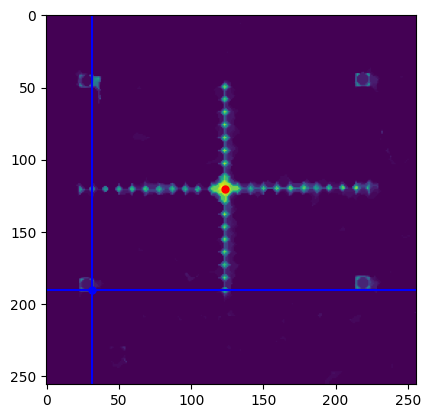

In [99]:
implot = plt.imshow(im_tif2_e)

# put a red dot, size 40, at 2 locations:
plt.scatter(x=123.1, y=120.0, c='r', s=25)
plt.scatter(x=31, y=190, c='b', s=25)

plt.axhline(y = 190, color = 'b', linestyle = '-')
plt.axvline(x = 31, color = 'b', linestyle = '-')

plt.show()

In [129]:
red = [123.1,120]
blue = [31,190]
dist = math.dist(red, blue)
mm = 12.8
# the distance is milimeters is approximately 10 in x axis and 8 in y-axis making it 12.8 according to the pythagoreas theorem
print("the distance between red and blue is : {} in mm: {}".format(dist, mm))

the distance between red and blue is : 115.68236684992229 in mm: 12.8


In [103]:
im_tif3_e = dip.Erosion(imtif3_dilated)
msr3 = Tool.Measure(imtif3_labeled, imtif3_dilated, ['Center', 'Gravity'])
print(msr3)

  |                  Center |                 Gravity | 
- | ----------------------- | ----------------------- | 
  |       dim0 |       dim1 |       dim0 |       dim1 | 
  |       (px) |       (px) |       (px) |       (px) | 
- | ---------- | ---------- | ---------- | ---------- | 
1 |      218.8 |      44.94 |      218.9 |      45.03 | 
2 |      30.48 |      47.40 |      30.43 |      47.49 | 
3 |      124.6 |      120.0 |      119.9 |      120.8 | 
4 |      218.8 |      185.5 |      219.2 |      185.6 | 
5 |      27.55 |      186.6 |      27.74 |      186.6 | 



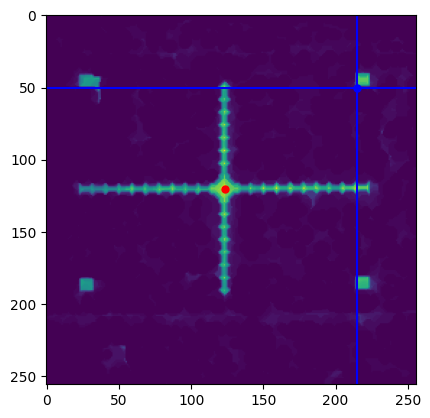

In [114]:
implot = plt.imshow(im_tif3_e)

# put a red dot, size 40, at 2 locations:
plt.scatter(x=123.1, y=120.0, c='r', s=25)
plt.scatter(x=215, y=50.03, c='b', s=25)

plt.axhline(y=50.03, color = 'b', linestyle = '-')
plt.axvline(x = 215, color = 'b', linestyle = '-')

plt.show()

In [128]:
red = [123.1,120]
blue = [215,50.03]
dist = math.dist(red, blue)
mm = 12.04
# the distance is milimeters is approximately 9 in x axis and 8 in y-axis making it 12.04 according to the pythagoreas theorem
print("the distance between red and blue is : {} in mm: {}".format(dist, mm))

the distance between red and blue is : 115.5050254317967 in mm: 12.04


In [117]:
im_tif4_e = dip.Erosion(imtif3_dilated) #eroded to help see points clearer
msr4 = Tool.Measure(imtif4_labeled, imtif4_dilated, ['Center', 'Gravity'])
print(msr4)

  |                  Center |                 Gravity | 
- | ----------------------- | ----------------------- | 
  |       dim0 |       dim1 |       dim0 |       dim1 | 
  |       (px) |       (px) |       (px) |       (px) | 
- | ---------- | ---------- | ---------- | ---------- | 
1 |      218.9 |      44.85 |      219.0 |      44.87 | 
2 |      30.66 |      47.39 |      30.65 |      47.48 | 
3 |      125.0 |      120.0 |      120.6 |      120.8 | 
4 |      218.8 |      185.5 |      219.2 |      185.6 | 
5 |      27.55 |      186.6 |      27.74 |      186.6 | 



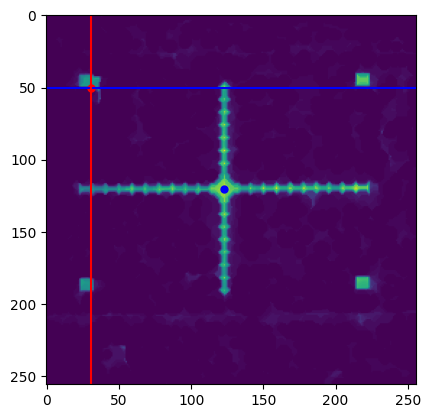

In [127]:
implot = plt.imshow(im_tif4_e)

# put a red dot, size 40, at 2 locations:
plt.scatter(x=30.66, y=50.03, c='r', s=25)
plt.scatter(x=123, y=120, c='b', s=25)

plt.axhline(y=50.03, color = 'b', linestyle = '-')
plt.axvline(x = 30.66, color = 'r', linestyle = '-')

plt.show()

In [126]:
red = [30.66,50.03]
blue = [123,120]
dist = math.dist(red, blue)
mm = 12.04
# the distance is milimeters is approximately 10 in x axis and 8 in y-axis making it 12.04 according to the pythagoreas theorem
print("the distance between red and blue is : {} in mm: {}".format(dist, mm))

the distance between red and blue is : 115.85541204449622 in mm: 12.04


# Part 3.4

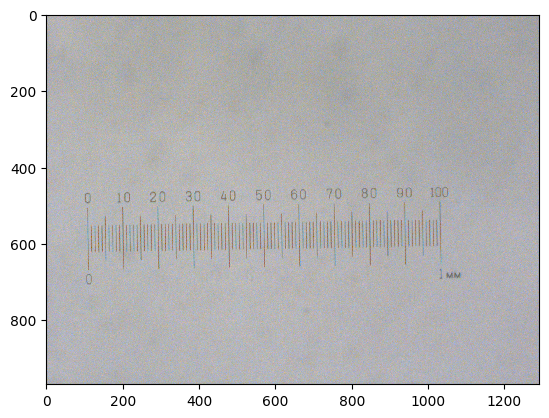

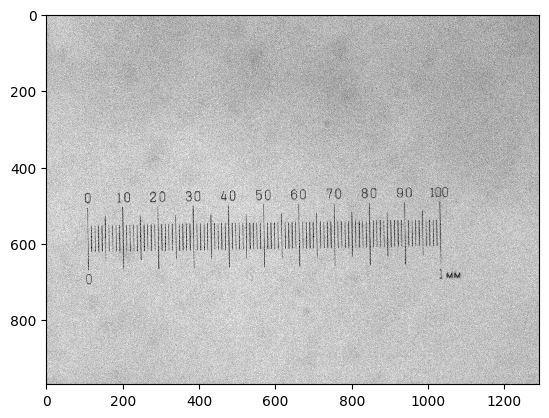

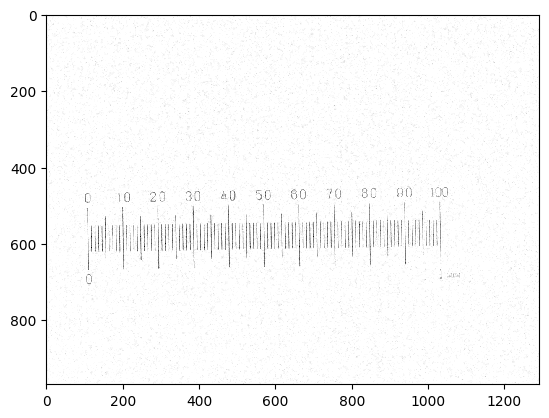

In [ ]:
a_4 = dip.ImageReadTIFF(path + "CamIm04.tif")
a_4.Show()
#print(a_4)
a_4_arr = np.array(a_4)

gray_image = np.mean(a_4_arr, axis=2)

# Convert back to uint8 and clip values between 0 and 255
gray_image = np.clip(gray_image, 0, 255).astype('uint8')

# Create a new dip.Image object from the grayscale array
gray_image_dip = dip.Image(gray_image)

# Display the grayscale image
gray_image_dip.Show()

a4_r_10 = dip.MorphologicalRange(gray_image_dip, 4.5)
a4_r_10 = 1 - a4_r_10

a4_csr_10 = dip.ContrastStretch(a4_r_10, 0, 30)
a4_csr_10.Show()

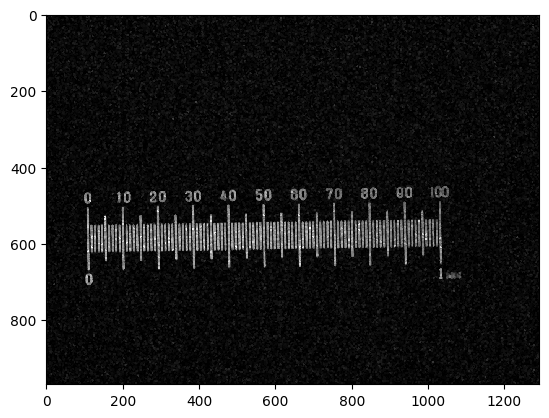

In [ ]:
a4_csr_10_inv = 1-a4_csr_10 #invert the image
a4_dilated= dip.Dilation(a4_csr_10_inv, 5) #dilate the image
a4_dilated.Show()

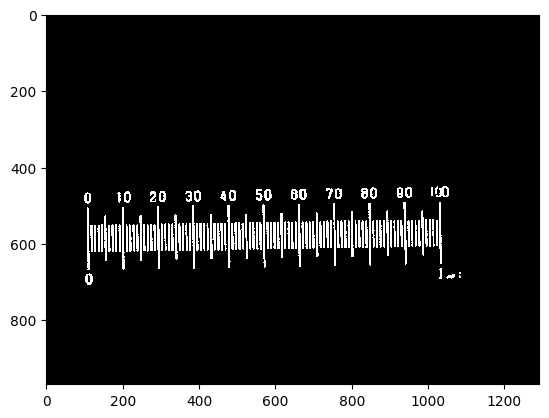

In [ ]:
a4_thresh = dip.IsodataThreshold(a4_dilated)
a4_thresh.Show()

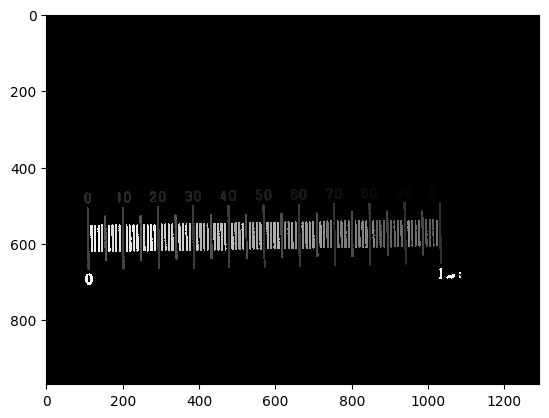

In [ ]:
a4_labeled = dip.Label(a4_thresh)
a4_labeled.Show()

In [ ]:
a4_labeled = dip.Image(a4_labeled)
a4_dilated = dip.Image(a4_dilated)
msr = []
msr = Tool.Measure(a4_labeled, a4_dilated, ['Gravity'])
print(msr)

    |                 Gravity | 
--- | ----------------------- | 
    |       dim0 |       dim1 | 
    |       (px) |       (px) | 
--- | ---------- | ---------- | 
  1 |      1039. |      466.0 | 
  2 |      1020. |      459.8 | 
  3 |      925.7 |      466.9 | 
  4 |      948.1 |      466.1 | 
  5 |      1010. |      463.5 | 
  6 |      856.2 |      467.6 | 
  7 |      832.8 |      468.2 | 
  8 |      763.8 |      469.7 | 
  9 |      736.5 |      458.6 | 
 10 |      743.4 |      469.8 | 
 11 |      649.0 |      471.4 | 
 12 |      672.1 |      471.3 | 
 13 |      556.5 |      472.3 | 
 14 |      580.3 |      472.7 | 
 15 |      487.3 |      474.6 | 
 16 |      395.9 |      475.7 | 
 17 |      303.9 |      477.2 | 
 18 |      373.9 |      476.2 | 
 19 |      464.5 |      476.2 | 
 20 |      279.8 |      478.3 | 
 21 |      212.0 |      478.1 | 
 22 |      108.3 |      480.1 | 
 23 |      191.2 |      479.5 | 
 24 |      938.9 |      569.3 | 
 25 |      1031. |      570.9 | 
 26 |     

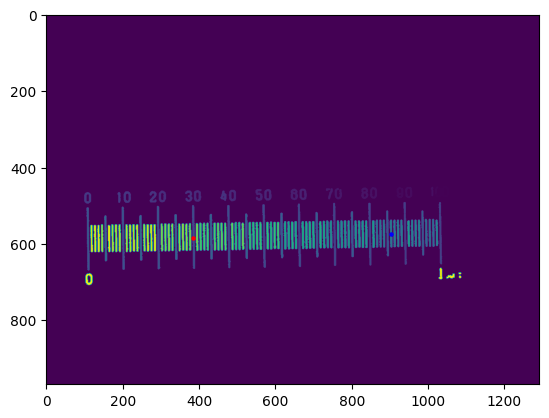

In [ ]:
implot = plt.imshow(a4_labeled)


# put a red dot, size 40, at 2 locations:
plt.scatter(x=385.5, y=583.1, c='r', s=5)
plt.scatter(x=902.1, y=574.7, c='b', s=5)

#print(mask[1872][1875])
plt.show()

In [ ]:
red = [385.5,583.1] #red point on graph
blue = [902.1, 574.7] #blue point on graph
distance = math.dist(red, blue)
#distance in mm between red and blue is 86 - 30 which is 56.
mm = 56

print("Distance in number of pixels: {} and the distance in mm: {}".format(distance, mm))

Distance in number of pixels: 516.6682881694986 and the distance in mm: 56
